### Visualization of scRNA-seq datasets using PCA, tSNE, UMAP etc.

Here, I will play around with and explore two datasets, the embryoid body data and retinal bipolar cells data, and explore how different methods for dimensionality reduction and visualization work.

In [1]:
import os
import scprep
import tasklogger
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()
sns.set_style('ticks')

### Retinal Bipolar Cells dataset

In [7]:
data_path = '/Users/anuraglimdi/Desktop/Single_cell_workshop/Datasets/retinal_bipolar_2/'

In [8]:
data = scprep.io.load_mtx(data_path+"matrix.mtx",
                         cell_names=data_path+"cell_names.tsv",
                         gene_names=data_path+"gene_names.tsv")
data.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,n-R5s77,n-R5s8,n-R5s85,n-R5s86,n-R5s87,n-R5s88,n-R5s92,n-R5s93,n-R5s95,n-R5s96
Bipolar1_CCCACAAGACTA,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_TCGCCTCGTAAG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CAAAGCATTTGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CTTTTGATTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_GCTCCAATGACA,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
metadata = scprep.io.load_tsv(data_path+"/metadata.tsv")
metadata.head()

/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/scprep/sanitize.py:49: RuntimeWarning: Data is not numeric. Many scprep functions will not work.
  warnings.warn(


,CLUSTER,SUB-CLUSTER,CELLTYPE
Bipolar1_CCCACAAGACTA,11.0,11,BC5D
Bipolar1_TCGCCTCGTAAG,23.0,23,23
Bipolar1_CAAAGCATTTGC,5.0,5,BC6
Bipolar1_CTTTTGATTGAC,4.0,4,BC7
Bipolar1_GCTCCAATGACA,1.0,1,Rod BC


 Removing cells based on library size

In [11]:
data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=(20,80))

Normalizing all the cells to the same number of reads

In [12]:
data = scprep.normalize.library_size_normalize(data)

Removing cells based on mitochondrial gene expression

<AxesSubplot:xlabel='Gene expression', ylabel='Number of cells'>

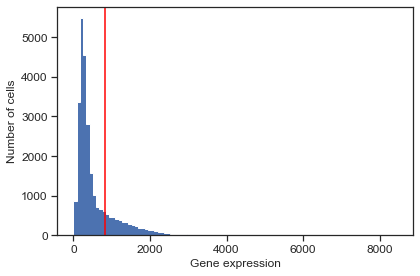

In [13]:
scprep.plot.plot_gene_set_expression(data, starts_with="mt-", percentile=80)

In [14]:
data, metadata = scprep.filter.filter_gene_set_expression(
    data, metadata, starts_with="mt-", keep_cells='below', percentile=80)
data.shape

(21552, 24904)

In [15]:
#removing genes that are expressed in less than 10 cells
data = scprep.filter.filter_rare_genes(data, min_cells=10)
data.shape

(21552, 15524)

In [16]:
#square root transformation of the dataset
data = scprep.transform.sqrt(data)

### tSNE visualization

In [26]:
from sklearn.decomposition import PCA
import sklearn.manifold

In [25]:
#first PCA transform the data and then do tSNE on it
data_reduced = PCA(n_components=100).fit_transform(data.sparse.to_dense())

In [88]:
tsne_op = sklearn.manifold.TSNE(perplexity=50)

In [29]:
data_tsne = tsne_op.fit_transform(data_reduced)

/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

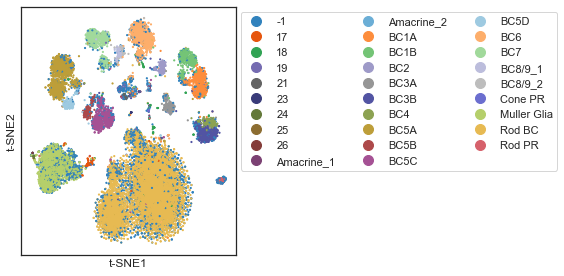

In [31]:
scprep.plot.scatter2d(data_tsne, c=metadata['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

Subsampling this dataset because it takes forever to run the tSNE algorithm on the full dataset

In [85]:
data_pca_subsample, metadata_subsample = scprep.select.subsample(data_reduced, metadata, n=4000)

In [89]:
data_tsne = tsne_op.fit_transform(data_pca_subsample)

/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

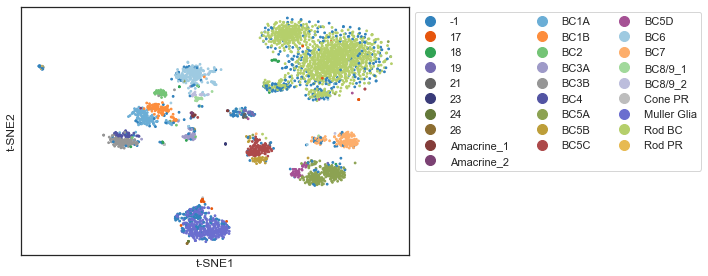

In [90]:
scprep.plot.scatter2d(data_tsne, c=metadata_subsample['CELLTYPE'],
                      figsize=(10,4), legend_anchor=(1,1), ticks=False, label_prefix='t-SNE')

### UMAP visualization

In [91]:
import umap

In [95]:
umap_op = umap.UMAP()
data_umap = umap_op.fit_transform(data_reduced)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

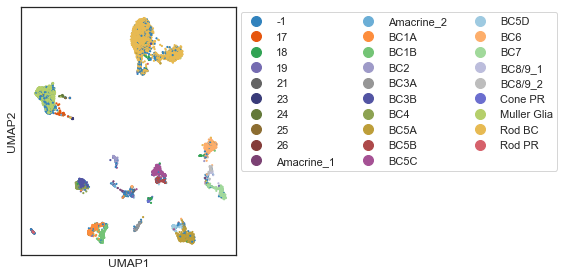

In [96]:
scprep.plot.scatter2d(data_umap, c=metadata['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [97]:
import phate

In [101]:
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(data_reduced)

Calculating PHATE...
  Running PHATE on 21552 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 35.22 seconds.
    Calculating affinities...
    Calculated affinities in 17.09 seconds.
  Calculated graph and diffusion operator in 52.34 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.21 seconds.
    Calculating KMeans...
    Calculated KMeans in 7.38 seconds.
  Calculated landmark operator in 10.24 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 3.64 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.92 seconds.
Calculated PHATE in 70.23 seconds.


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

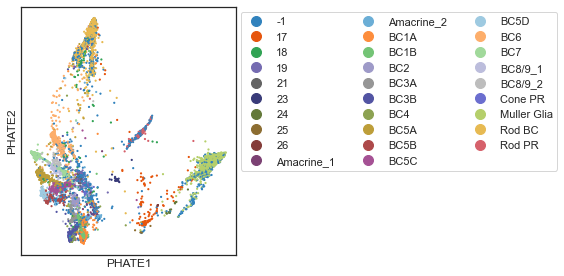

In [149]:
scprep.plot.scatter2d(data_phate, c=metadata['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

### Embryoid Body Dataset

Instead of going through the entire preprocessing pipeline again, I will load processed data.

In [105]:
datapath2 = '/Users/anuraglimdi/Desktop/Single_cell_workshop/Datasets/'

In [107]:
eb_data = pd.read_pickle(datapath2+'embryoid_body_data.pickle.gz')
eb_metadata = pd.read_pickle(datapath2+'embryoid_body_metadata.pickle.gz')

In [115]:
eb_data_reduced = scprep.reduce.pca(eb_data, n_components=200, method='dense')

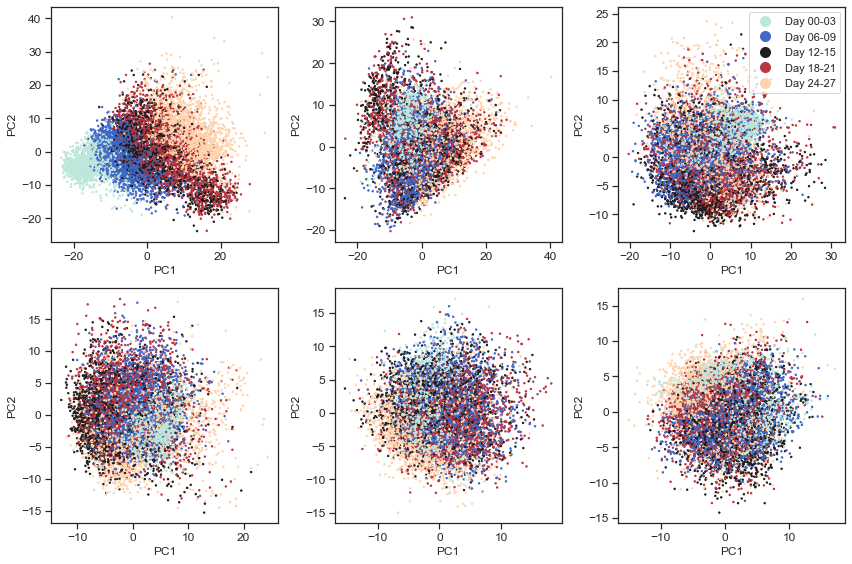

In [117]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(eb_data_reduced.iloc[:,i], eb_data_reduced.iloc[:,i+1], c=eb_metadata['sample_labels'],
                        cmap='icefire', ax=ax,
                        label_prefix="PC", legend=legend)
fig.tight_layout()

In [129]:
tsne_op = sklearn.manifold.TSNE(n_components=2, perplexity=100)
eb_data_tsne1 = tsne_op.fit_transform(eb_data_reduced.iloc[:,:20])

/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [130]:
tsne_op = sklearn.manifold.TSNE(n_components=2, perplexity=100)
eb_data_tsne2 = tsne_op.fit_transform(eb_data_reduced.iloc[:,:5])

/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [131]:
tsne_op = sklearn.manifold.TSNE(n_components=2, perplexity=100)
eb_data_tsne3 = tsne_op.fit_transform(eb_data_reduced.iloc[:,:100])

/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anuraglimdi/opt/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:title={'center':'20 PCs'}, xlabel='t-SNE1', ylabel='t-SNE2'>

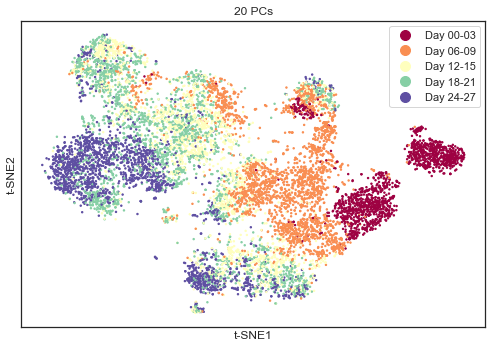

In [132]:
scprep.plot.scatter2d(eb_data_tsne1, c=eb_metadata['sample_labels'], cmap='Spectral', 
                      ticks=False, label_prefix='t-SNE', title="20 PCs",
                      legend_anchor=(1,1), figsize=(7,5))

<AxesSubplot:title={'center':'5 PCs'}, xlabel='t-SNE1', ylabel='t-SNE2'>

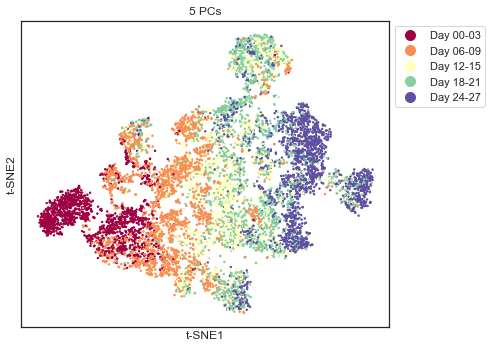

In [133]:
scprep.plot.scatter2d(eb_data_tsne2, c=eb_metadata['sample_labels'], cmap='Spectral', 
                      ticks=False, label_prefix='t-SNE', title="5 PCs",
                      legend_anchor=(1,1), figsize=(7,5))

<AxesSubplot:title={'center':'100 PCs'}, xlabel='t-SNE1', ylabel='t-SNE2'>

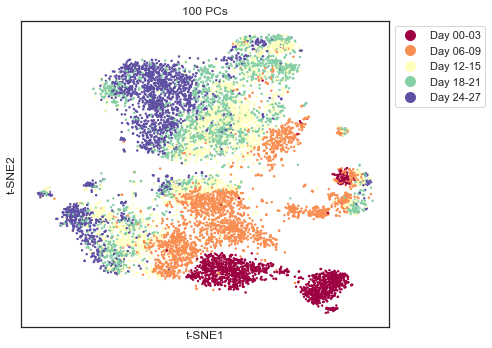

In [134]:
scprep.plot.scatter2d(eb_data_tsne3, c=eb_metadata['sample_labels'], cmap='Spectral', 
                      ticks=False, label_prefix='t-SNE', title="100 PCs",
                      legend_anchor=(1,1), figsize=(7,5))

Data is more clustered (vs continuous) with higher perplexity and number of PCs

In [143]:
eb_data_umap = umap.UMAP(n_neighbors=200).fit_transform(eb_data_reduced.iloc[:,:100])

In [144]:
eb_data_umap = pd.DataFrame(eb_data_umap, index = eb_data.index)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

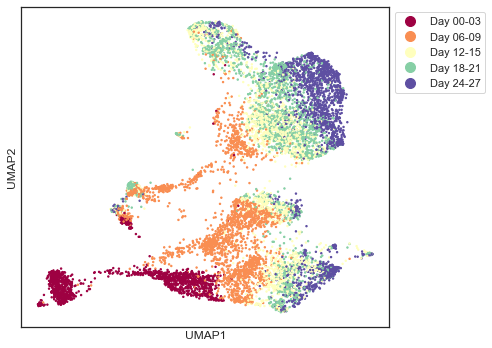

In [145]:
scprep.plot.scatter2d(eb_data_umap, c=eb_metadata['sample_labels'], cmap='Spectral', 
                      ticks=False, label_prefix='UMAP',
                      legend_anchor=(1,1), figsize=(7,5))

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

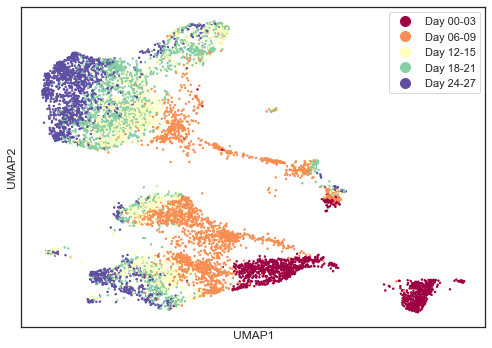

In [148]:
eb_data_umap2 = umap.UMAP(n_neighbors=50).fit_transform(eb_data_reduced.iloc[:,:100])
eb_data_umap2 = pd.DataFrame(eb_data_umap2, index = eb_data.index)
scprep.plot.scatter2d(eb_data_umap2, c=eb_metadata['sample_labels'], cmap='Spectral', 
                      ticks=False, label_prefix='UMAP',
                      legend_anchor=(1,1), figsize=(7,5))


In [161]:
eb_phate_op = phate.PHATE(knn=100, n_jobs=-2)

eb_data_phate = phate_op.fit_transform(eb_data_reduced.iloc[:,:100])


Calculating PHATE...
  Running PHATE on 9717 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 6.61 seconds.
    Calculating affinities...
    Calculated affinities in 0.37 seconds.
  Calculated graph and diffusion operator in 6.99 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.55 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.78 seconds.
  Calculated landmark operator in 7.75 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 2.63 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.85 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.88 seconds.
Calculated PHATE in 21.13 seconds.


In [162]:
eb_data_phate = pd.DataFrame(eb_data_phate, index=eb_data.index)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

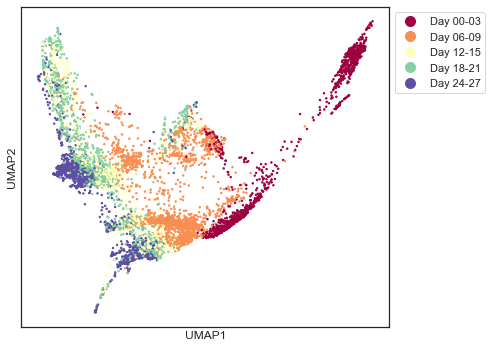

In [163]:
scprep.plot.scatter2d(eb_data_phate, c=eb_metadata['sample_labels'], cmap='Spectral', 
                      ticks=False, label_prefix='UMAP',
                      legend_anchor=(1,1), figsize=(7,5))